In [9]:
from utils import * 
from process import * 
import numpy as np 
import matplotlib.pyplot as plt
import limiirl

In [5]:
trajs = read_json("data/process/trajs_36.json")

In [20]:
patients_df = read_csv_to_dataframe("data/patients.csv")
inputevents_df = read_csv_to_dataframe("data/inputevents.csv")
vitalsign_df = read_csv_to_dataframe("data/vitalsign.csv")
outputevents_df = read_csv_to_dataframe("data/outputevents.csv")
d_items_df = read_csv_to_dataframe("data/d_items.csv")


In [8]:
outputs = pd.merge(outputevents_df, d_items_df, on="itemid")

In [22]:
np.unique(inputevents_df['ordercategorydescription'])

array(['Bolus', 'Continuous IV', 'Continuous Med', 'Drug Push',
       'Non Iv Meds'], dtype=object)

In [7]:
d_items_df

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,220001,Problem List,Problem List,chartevents,General,bpm,Text,90.0,140.0
1,220003,ICU Admission date,ICU Admission date,datetimeevents,ADT,bpm,Date and time,90.0,140.0
2,220045,Heart Rate,HR,chartevents,Routine Vital Signs,bpm,Numeric,90.0,140.0
3,220046,Heart rate Alarm - High,HR Alarm - High,chartevents,Alarms,bpm,Numeric,90.0,140.0
4,220047,Heart Rate Alarm - Low,HR Alarm - Low,chartevents,Alarms,bpm,Numeric,90.0,140.0
...,...,...,...,...,...,...,...,...,...
4009,230077,Documented on DC Summary (PICC),Documented on DC Summary (PICC),chartevents,PICC Line Insertion,NaN,Text,NaN,NaN
4010,230078,Documented on DC Summary (Thora),Documented on DC Summary (Thora),chartevents,Thoracentesis,NaN,Text,NaN,NaN
4011,230083,Replacement Fluid (Pre-Filter),Replacement Fluid (Pre-Filter),chartevents,Dialysis,NaN,Text,NaN,NaN
4012,230084,Replacement Fluid (Post-Filter),Replacement Fluid (Post-Filter),chartevents,Dialysis,NaN,Text,NaN,NaN


In [22]:
d = d_items_df[d_items_df['linksto'] == "outputevents"]

In [23]:
d

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
717,224458,Drain Output_ingr,Drain Output_ingr,outputevents,Drains,mL,Ingredient,299.0,750.0
1875,226557,R Ureteral Stent,R Ureteral Stent,outputevents,Output,mL,Numeric,0.0,8.0
1876,226558,L Ureteral Stent,L Ureteral Stent,outputevents,Output,mL,Numeric,0.0,8.0
1877,226559,Foley,Foley,outputevents,Output,mL,Numeric,0.0,8.0
1878,226560,Void,Void,outputevents,Output,mL,Numeric,0.0,8.0
...,...,...,...,...,...,...,...,...,...
2245,227511,TF Residual Output,TF Residual Output,outputevents,Output,mL,Numeric,4.0,8.0
2390,227701,Drainage Bag,Drainage Bag,outputevents,Drains,mL,Numeric,4.0,20.0
2653,228103,Stool containment device placed,Stool containment device placed,outputevents,Output,cm,Date and time,4.0,20.0
3595,229413,Chest Tube #3,Chest Tube #3,outputevents,Output,mL,Numeric,4.0,20.0


In [3]:
data_pv = pd.merge(patients_df, vitalsign_df, on='subject_id', how='inner')

In [4]:
data_pv

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,F,52,2180,2014 - 2016,2180-09-09,32952584,2180-07-22 16:36:00,98.4,83.0,24.0,97.0,90.0,51.0,Sinus Bradycardia,0
1,10000032,F,52,2180,2014 - 2016,2180-09-09,32952584,2180-07-22 16:43:00,98.4,85.0,22.0,98.0,76.0,39.0,Sinus Bradycardia,0
2,10000032,F,52,2180,2014 - 2016,2180-09-09,32952584,2180-07-22 16:45:00,98.4,84.0,22.0,97.0,75.0,39.0,Sinus Bradycardia,0
3,10000032,F,52,2180,2014 - 2016,2180-09-09,32952584,2180-07-22 17:56:00,98.4,84.0,20.0,99.0,86.0,51.0,Sinus Bradycardia,0
4,10000032,F,52,2180,2014 - 2016,2180-09-09,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,Sinus Bradycardia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564605,19999828,F,46,2147,2017 - 2019,2164-09-17,32917002,2149-01-08 17:10:00,98.1,109.0,15.0,96.0,111.0,78.0,Sinus Tachycardia,0
1564606,19999914,F,49,2158,2017 - 2019,NaN,32002659,2158-12-24 11:43:00,99.5,81.0,10.0,100.0,93.0,55.0,Sinus Tachycardia,0
1564607,19999987,F,57,2145,2011 - 2013,NaN,34731548,2145-11-02 19:40:00,99.3,112.0,18.0,NaN,118.0,83.0,Sinus Tachycardia,unable
1564608,19999987,F,57,2145,2011 - 2013,NaN,34731548,2145-11-02 20:11:00,99.3,111.0,18.0,NaN,123.0,82.0,Sinus Tachycardia,unable


In [5]:
outputevents_df

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom
0,10000032,29079034,39553978,88981,2180-07-23 15:00:00,2180-07-23 16:00:00,226560,175.0,ml
1,10000980,26913865,39765666,36518,2189-06-27 09:08:00,2189-06-27 09:08:00,226559,450.0,ml
2,10000980,26913865,39765666,36518,2189-06-27 09:08:00,2189-06-27 09:08:00,226633,400.0,ml
3,10000980,26913865,39765666,36518,2189-06-27 11:00:00,2189-06-27 10:51:00,226559,600.0,ml
4,10000980,26913865,39765666,36518,2189-06-27 13:00:00,2189-06-27 12:55:00,226559,800.0,ml
...,...,...,...,...,...,...,...,...,...
4234962,19999987,23865745,36195440,86756,2145-11-03 05:00:00,2145-11-03 05:48:00,226559,25.0,ml
4234963,19999987,23865745,36195440,86756,2145-11-03 05:48:00,2145-11-03 05:48:00,226576,300.0,ml
4234964,19999987,23865745,36195440,86756,2145-11-03 07:00:00,2145-11-03 07:00:00,226559,30.0,ml
4234965,19999987,23865745,36195440,90295,2145-11-02 23:25:00,2145-11-02 23:25:00,226627,200.0,ml


In [17]:
data_pv = pd.merge(data_pv, outputevents_df, on="subject_id")

In [18]:
data_pv

,gender,anchor_age,anchor_year,anchor_year_group,dod,stay_id_x,charttime_x,temperature,heartrate,resprate,...,valueuom_x,subject_id,hadm_id_y,stay_id_y,caregiver_id_y,charttime_y,storetime_y,itemid_y,value_y,valueuom_y


In [8]:
arr = np.array([1.18784801, 1.4534173 , 1.12935763, 1.26796201, 1.07898179,
       1.21513545, 1.25520845, 1.23500749, 1.167292  , 1.50256677,
       1.39734868, 1.05689582, 1.03484047, 1.17801204, 1.1768164 ,
       1.42684212, 1.10825832, 1.00119351, 1.43787961, 1.50529759,
       1.33773403, 1.44921706, 1.24936765, 1.15225961, 1.20654146,
       1.48499753, 1.0724417 , 1.06506899, 1.41818826, 1.01612286,
       1.19655148, 1.63847045, 1.21809469, 1.36818722, 1.09885751,
       1.37179886, 1.00302245, 1.15272244, 1.24784826, 1.55306292,
       1.37177485, 1.72718029, 1.34289825, 1.27212114, 1.04369038,
       1.32262552, 1.02960092, 1.10198338, 1.40416604, 1.10758402,
       1.01756739, 1.012628  , 1.00689453, 1.09374555, 1.25469947,
       1.61407019, 1.00730298, 1.30371884, 1.03967837, 1.02626866,
       1.00017887, 1.16825841, 1.52003539, 1.15811623, 1.17776978,
       1.15436209, 1.61931572, 1.00669036, 1.05027372, 1.07876716,
       1.02772921, 1.1332577 , 1.3715207 , 1.43087142, 1.06745055,
       1.07200031, 1.89796675, 1.11864153, 1.00038171, 1.46822885,
       1.01078155, 1.23250752, 1.49587824, 1.02377531, 1.51112272,
       1.11909745, 1.16873248, 1.28300218, 1.30928557, 1.67713338,
       1.33502382, 1.56920874, 1.08601035, 1.33285997, 1.18688221,
       1.06399348, 1.27108485, 1.213904  , 1.56476002, 1.20190107,
       1.13073259, 1.02731326, 1.01303879, 1.06119223, 1.40445079,
       1.2367638 , 1.30371592, 1.3374628 , 1.1055647 , 1.09507756,
       1.08139534, 1.37932153, 1.18303578, 1.4454812 , 1.13647963,
       1.05390069, 1.17443385, 1.16541862, 1.08490746, 1.17872871,
       1.08600805, 1.352733  , 1.04052205, 1.18953536, 1.04136412,
       1.45489175, 1.22627129, 1.03736162, 1.06356204, 1.07157213,
       1.02335968, 1.16494701, 1.12935763, 1.40473546, 1.13578373,
       1.34453318, 1.1417889 , 1.04899658, 1.02398515, 1.12478579,
       1.30213645, 1.22329426, 1.03169745, 1.00893846, 1.31674093,
       1.37737074, 1.0356762 , 1.01323566, 2.00154095, 1.03694065,
       1.08645104, 1.18016475, 1.18807396, 1.49769942, 1.34644313,
       1.0443271 , 1.38971806, 1.11366527, 1.1550666 , 1.00119351,
       1.07658176, 1.06248109, 1.35740926, 1.50836391, 1.15436468,
       1.20580766, 1.13601879, 1.14432393, 1.14735892, 1.74336358,
       1.07876716, 1.23927436, 1.16896706, 1.08931712, 1.44724103,
       1.42973453, 1.01529816, 1.0097572 , 1.01078153, 1.35904076,
       1.13945213, 1.05367712, 1.45459672, 1.06528655, 1.06658343,
       1.10108942, 1.23826907, 1.02752134, 1.60982072, 1.07810791,
       1.37708435, 1.18977662, 1.58874054, 1.04199709, 1.2869108 ,
       1.10960759, 1.41445448, 1.25266453, 1.09930366, 1.08227097,
       1.03546985, 1.16187997, 1.05775287, 1.1332577 , 1.01777036,
       1.48861561, 1.09684847, 1.7486777 , 1.1352913 , 1.26363339,
       1.39621567, 1.06485583, 1.14527112, 1.03651805, 1.51112249,
       1.08755075, 1.01221739, 1.09885923, 1.21784474, 1.26388993,
       1.44665418, 1.50256231, 1.17586215, 1.00078753, 1.54020417,
       1.07440079, 1.14573571, 1.38325197, 1.01447784, 1.43933861,
       1.00017887, 1.17777394, 1.10175708, 1.19873294, 1.08799437,
       1.21191642, 1.32316502, 1.01427213, 1.32289672, 1.16991857,
       1.02232555, 1.28404043, 1.10915765, 1.40217421, 1.12068829,
       1.20189809, 1.05622163, 1.05176567, 1.47568794, 1.10131071,
       1.5352147 , 1.31034509, 1.13324676, 1.03483974, 1.051126  ,
       1.10243041, 1.60167984, 1.45694803, 1.07374735, 1.09663315,
       1.26748612, 1.42424056, 1.1181912 , 1.11660443, 1.32531239,
       1.03358047, 1.19727964, 1.17418213, 1.22826587, 1.045125  ,
       1.14643294, 1.14411047, 1.12513895, 1.11231106, 1.18373832,
       1.23601163, 1.48379346, 1.45695846, 1.10983263, 1.72647989,
       1.26568534, 1.01466845, 1.02149568, 1.76470519, 1.6311804 ,
       1.15904483, 1.08976086, 1.36016422, 1.44665416, 1.31165923,
       1.05027256, 1.27625519, 1.1311902 , 1.1046513 , 1.18784801,
       1.04793324, 1.35411007, 1.09822856, 1.29923503, 1.05389894,
       1.00587231, 1.30769218, 1.33069906, 1.04221147, 1.03316299,
       1.42337437, 1.05091287, 1.23676377, 1.11163458, 1.02771856,
       1.16282281, 1.23525988, 1.26286766, 1.46020678, 1.09574396,
       1.01796197, 1.12547027, 1.28664953, 1.17109593, 1.16187997,
       1.12592755, 1.39451789, 1.66865237, 1.31246287, 1.01221739,
       1.44459461, 1.13740171, 1.01652725, 1.06442457, 1.02917927,
       1.04793302, 1.07244141, 1.11073324, 1.05496982, 1.06054683,
       1.0300246 , 1.07505403, 1.07614521, 1.39508359, 1.21685902,
       1.11389072, 1.0558259 , 1.075927  , 1.13832484, 1.47091118,
       1.05005476, 1.2111992 , 1.04644653, 1.22031769, 1.10511422,
       1.06766543, 1.6508141 , 1.0564647 , 1.19386948, 1.00689453,
       1.27806833, 1.13624664, 1.60493137, 1.16873294, 1.05947191,
       1.19001791, 1.06787733, 1.31593716, 1.01098655, 1.31460262,
       1.02128833, 1.06054496, 1.31700735, 1.238468  , 1.08953989,
       1.01078155, 1.22676957, 1.03589027, 1.12227775, 1.10757834,
       1.15905602, 1.02897995, 1.25800873, 1.01078155, 1.00996199,
       1.09707745, 1.34208094, 1.12000669, 1.2036085 , 1.02232242,
       1.2869108 , 1.05839717, 1.04623483, 1.07657796, 1.2033649 ,
       1.68019669, 1.2161205 , 1.01880726, 1.08931498, 1.22279623,
       1.34262532, 1.04136641, 1.05197897, 1.18832943, 1.03504945])

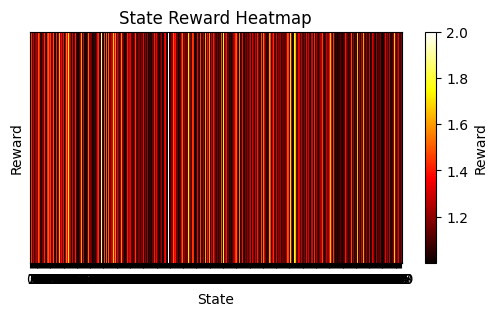

In [9]:
plot_reward_heatmap(arr)